In [84]:
train_path = '/content/drive/MyDrive/DATASETS/BreastCancer1/train'
test_path = '/content/drive/MyDrive/DATASETS/BreastCancer1/test'

In [114]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from tensorflow.keras import models,layers
import os
import glob
import cv2

In [152]:
print(os.listdir("/content/drive/MyDrive/DATASETS/BreastCancer1"))
print(glob.glob('/content/drive/MyDrive/DATASETS/BreastCancer1/train/*'))
print(glob.glob('/content/drive/MyDrive/DATASETS/BreastCancer1/test/*'))
classes = ["NoCancer","Cancer"]

['test', 'train']
['/content/drive/MyDrive/DATASETS/BreastCancer1/train/0_NoCancer', '/content/drive/MyDrive/DATASETS/BreastCancer1/train/1_Cancer']
['/content/drive/MyDrive/DATASETS/BreastCancer1/test/0_NoCancer', '/content/drive/MyDrive/DATASETS/BreastCancer1/test/1_Cancer']


In [116]:
train_images=[]
train_labels=[]
for directory_path in glob.glob('/content/drive/MyDrive/DATASETS/BreastCancer1/train/*'):
  label=directory_path.split("//")[-1]
  print(label)
  for img_path in glob.glob(os.path.join(directory_path,"*.png")):
    print(img_path)
    img=cv2.imread(img_path,cv2.IMREAD_COLOR)
    img=cv2.resize(img,(50,50))
    img=cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
    train_images.append(img)
    train_labels.append(label)

/content/drive/MyDrive/DATASETS/BreastCancer1/train/0_NoCancer
/content/drive/MyDrive/DATASETS/BreastCancer1/train/0_NoCancer/8863_idx5_x651_y1451_class0.png
/content/drive/MyDrive/DATASETS/BreastCancer1/train/0_NoCancer/8864_idx5_x1201_y1701_class0.png
/content/drive/MyDrive/DATASETS/BreastCancer1/train/0_NoCancer/8863_idx5_x1651_y1851_class0.png
/content/drive/MyDrive/DATASETS/BreastCancer1/train/0_NoCancer/8864_idx5_x1951_y851_class0.png
/content/drive/MyDrive/DATASETS/BreastCancer1/train/0_NoCancer/8863_idx5_x2551_y1551_class0.png
/content/drive/MyDrive/DATASETS/BreastCancer1/train/0_NoCancer/8863_idx5_x851_y1001_class0.png
/content/drive/MyDrive/DATASETS/BreastCancer1/train/0_NoCancer/8863_idx5_x951_y2001_class0.png
/content/drive/MyDrive/DATASETS/BreastCancer1/train/0_NoCancer/8864_idx5_x1001_y2001_class0.png
/content/drive/MyDrive/DATASETS/BreastCancer1/train/0_NoCancer/8863_idx5_x1251_y1751_class0.png
/content/drive/MyDrive/DATASETS/BreastCancer1/train/0_NoCancer/8863_idx5_x801

In [117]:
test_images=[]
test_labels=[]
for directory_path in glob.glob('/content/drive/MyDrive/DATASETS/BreastCancer1/test/*'):
  label=directory_path.split("//")[-1]
  print(label)
  for img_path in glob.glob(os.path.join(directory_path,"*.png")):
    print(img_path)
    img=cv2.imread(img_path,cv2.IMREAD_COLOR)
    img=cv2.resize(img,(50,50))
    img=cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
    test_images.append(img)
    test_labels.append(label)

/content/drive/MyDrive/DATASETS/BreastCancer1/test/0_NoCancer
/content/drive/MyDrive/DATASETS/BreastCancer1/test/0_NoCancer/8863_idx5_x351_y651_class0.png
/content/drive/MyDrive/DATASETS/BreastCancer1/test/0_NoCancer/8864_idx5_x951_y2351_class0.png
/content/drive/MyDrive/DATASETS/BreastCancer1/test/0_NoCancer/8864_idx5_x751_y2101_class0.png
/content/drive/MyDrive/DATASETS/BreastCancer1/test/0_NoCancer/8863_idx5_x201_y1201_class0.png
/content/drive/MyDrive/DATASETS/BreastCancer1/test/0_NoCancer/8863_idx5_x851_y1201_class0.png
/content/drive/MyDrive/DATASETS/BreastCancer1/test/0_NoCancer/8863_idx5_x1801_y2101_class0.png
/content/drive/MyDrive/DATASETS/BreastCancer1/test/0_NoCancer/8863_idx5_x1551_y651_class0.png
/content/drive/MyDrive/DATASETS/BreastCancer1/test/0_NoCancer/8863_idx5_x1401_y851_class0.png
/content/drive/MyDrive/DATASETS/BreastCancer1/test/0_NoCancer/8863_idx5_x901_y951_class0.png
/content/drive/MyDrive/DATASETS/BreastCancer1/test/0_NoCancer/8864_idx5_x851_y951_class0.png


In [118]:
train_images=np.asarray(train_images)
train_labels=np.asarray(train_labels)
test_images=np.asarray(test_images)
test_labels=np.asarray(test_labels)

In [119]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded=le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded=le.transform(train_labels)

In [120]:
x_train,y_train,x_test,y_test=train_images,train_labels_encoded,test_images,test_labels_encoded

In [121]:
x_train.shape

(200, 50, 50, 3)

'/content/drive/MyDrive/DATASETS/BreastCancer1/test/0_NoCancer'

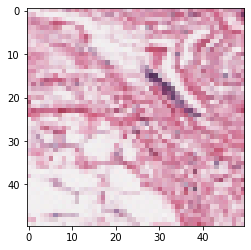

In [162]:
plt.imshow(x_test[2])
test_labels[2]

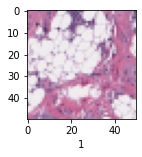

In [122]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(y[index])

plot_sample(x_train, y_train, 100)

In [123]:
#x_train_flatten=x_train.reshape(len(x_train),224*224,3)
#print("After Flattening the shape of x_train is : ",x_train_flatten.shape)
#x_test_flatten=x_test.reshape(len(x_test),224*224,3)
#print("After Flattening the shape of x_test is : ",x_test_flatten.shape)

In [124]:
X_train = x_train / 255.0
X_test = x_test / 255.0

In [170]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(50, 50, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(2, activation='sigmoid')
])
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
cnn.fit(X_train, y_train, epochs=20)

Epoch 1/20
7/7 [==============================] - 1s 97ms/step - loss: 0.7151 - accuracy: 0.4900
Epoch 2/20
7/7 [==============================] - 1s 94ms/step - loss: 0.6913 - accuracy: 0.5000
Epoch 3/20
7/7 [==============================] - 1s 98ms/step - loss: 0.6857 - accuracy: 0.5800
Epoch 4/20
7/7 [==============================] - 1s 96ms/step - loss: 0.6735 - accuracy: 0.5700
Epoch 5/20
7/7 [==============================] - 1s 97ms/step - loss: 0.6433 - accuracy: 0.6150
Epoch 6/20
7/7 [==============================] - 1s 98ms/step - loss: 0.7042 - accuracy: 0.5150
Epoch 7/20
7/7 [==============================] - 1s 97ms/step - loss: 0.6738 - accuracy: 0.5750
Epoch 8/20
7/7 [==============================] - 1s 96ms/step - loss: 0.6315 - accuracy: 0.6400
Epoch 9/20
7/7 [==============================] - 1s 96ms/step - loss: 0.5737 - accuracy: 0.6800
Epoch 10/20
7/7 [==============================] - 1s 96ms/step - loss: 0.7437 - accuracy: 0.5800
Epoch 11/20
7/7 [============

In [171]:
cnn.evaluate(X_test,y_test)

1/1 [==============================] - 0s 176ms/step - loss: 0.2302 - accuracy: 0.9000


[0.23020148277282715, 0.8999999761581421]

In [172]:
y_pred = cnn.predict(X_test)
len(y_pred)

20

In [173]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[0, 0, 0, 0, 0]

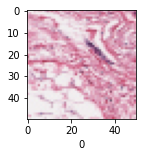

In [174]:
plot_sample(X_test, y_test,2)

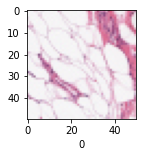

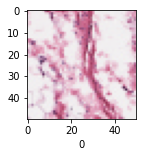

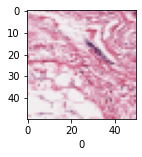

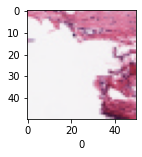

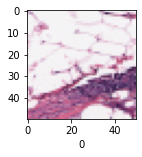

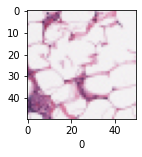

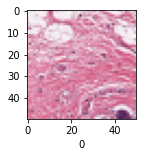

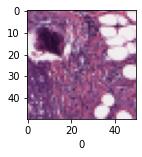

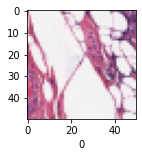

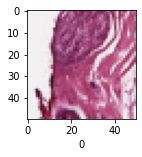

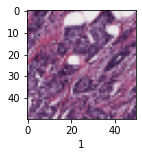

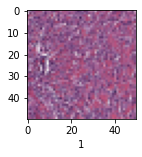

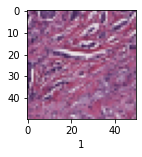

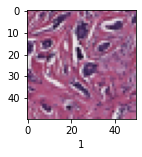

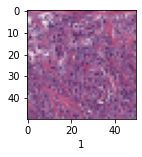

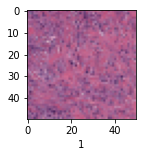

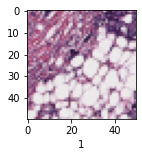

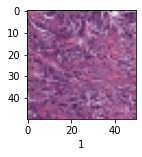

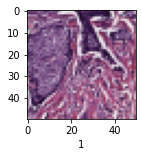

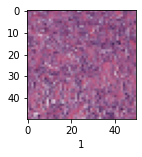

In [175]:
for i in range(len(y_pred)):
  plot_sample(x_test,y_test,i)